Data source: https://www.kaggle.com/mirichoi0218/insurance/downloads/insurance.zip/1

# Introduction

Health insurance in India is a growing segment of India's economy. The Indian health system is one of the largest in the world, with the number of people it concerns: nearly 1.3 billion potential beneficiaries. The health industry in India has rapidly become one of the most important sectors in the country in terms of income and job creation. In 2018, one hundred million Indian households (500 million people) do not benefit from health coverage. In 2011, 3.9%[1] of India's gross domestic product was spent in the health sector.

According to the World Health Organization (WHO), this is among the lowest of the BRICS (Brazil, Russia, India, China, South Africa) economies. Policies are available that offer both individual and family cover. Out of this 3.9%, health insurance accounts for 5-10% of expenditure, employers account for around 9% while personal expenditure amounts to an astounding 82%.

In the year 2016, the NSSO released the report “Key Indicators of Social Consumption in India: Health” based on its 71st round of surveys. The survey carried out in the year 2014 found out that, more than 80% of Indians are not covered under any health insurance plan, and only 18% (government funded 12%) of the urban population and 14% (government funded 13%) of the rural population was covered under any form of health insurance.

India's public health expenditures are lower than those of other middle-income countries. In 2012, they accounted for 4% of GDP, which is half as much as in China with 5.1%. In terms of public health spending per capita, India ranks 184th out of 191 countries in 2012. Patients' remaining costs represent about 58% of the total.[4] The remaining costs borne by the patient represent an increasing share of the household budget, from 5% of this budget in 2000 to over 11% in 2004-2005.[5] On average, the remaining costs of poor households as a result of hospitalization accounted for 140% of their annual income in rural areas and 90% in urban areas.

This financial burden has been one of the main reasons for the introduction of health insurance covering the hospital costs of the poorest.

# Data Description:

The data at hand contains medical costs of people characterized by certain attributes.

# Domain:
Healthcare

# Context:
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to have.

# Attribute Information:

- age : age of primary beneficiary
- sex : insurance contractor gender, female, male
- bmi : Body mass index, providing an understanding of body,
- weights that are relatively high or low relative to height,
- objective index of body weight (kg / m ^ 2) using the ratio of
- height to weight, ideally 18.5 to 24.9
- children : Number of children covered by health insurance /
- Number of dependents
- smoker : Smoking
- region : the beneficiary's residential area in the US, northeast,southeast, southwest, northwest.
- charges : Individual medical costs billed by health insurance.

## Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings("ignore")

## Read the data into the notebook

In [2]:
df=pd.read_csv('insurance.csv')

## Basic EDA
* Find the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# Check for missing value

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Checking the summary of dataframe

In [8]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# Plot the Histograms

<AxesSubplot:xlabel='age', ylabel='Density'>

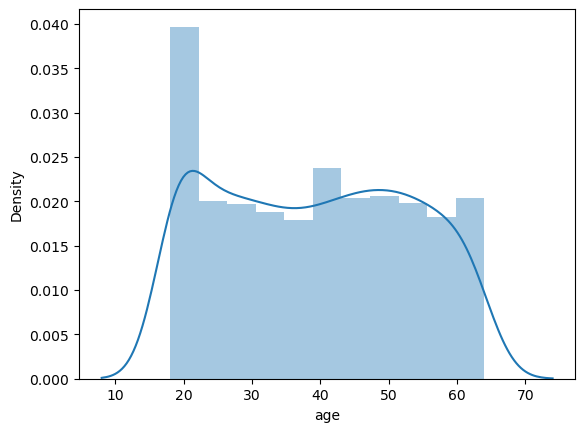

In [9]:
sns.distplot(df.age)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

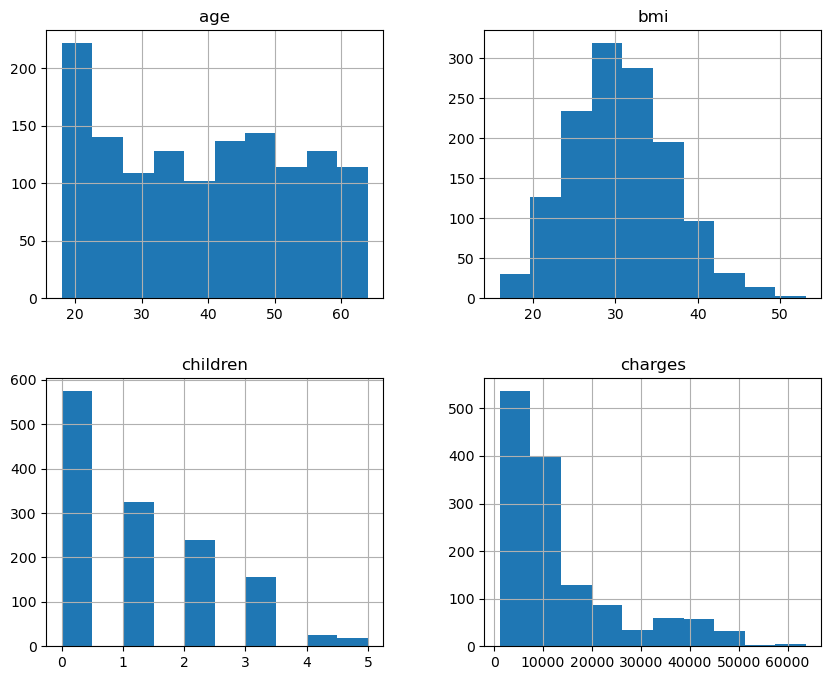

In [10]:
df.hist(figsize=(10,8))

In [11]:
#skewnes>+- 1 highly skewed
#skewness<1+- 0.5 fairly symmetrical
#skewness=0 symmetrical(normally / uniformally distributed data)

In [12]:
stats.skew(df.age)

0.055610083072599126

In [13]:
stats.skew(df.charges)

1.5141797118745743

In [14]:
stats.skew(df.children)

0.9373281163874423

In [15]:
stats.skew(df.bmi)

0.28372857291709386

# Check Outliers

<AxesSubplot:>

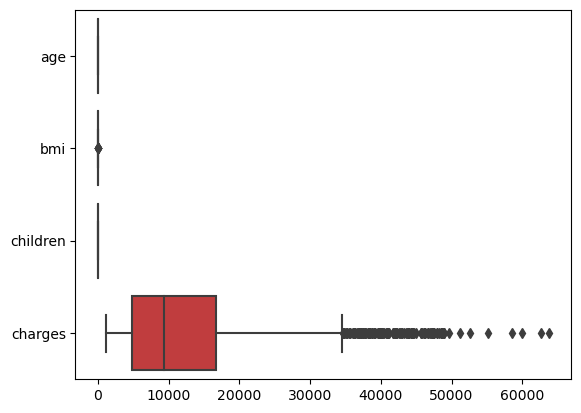

In [16]:
sns.boxplot(data=df,orient='h')

In [17]:
#charge is outlier

<AxesSubplot:xlabel='charges'>

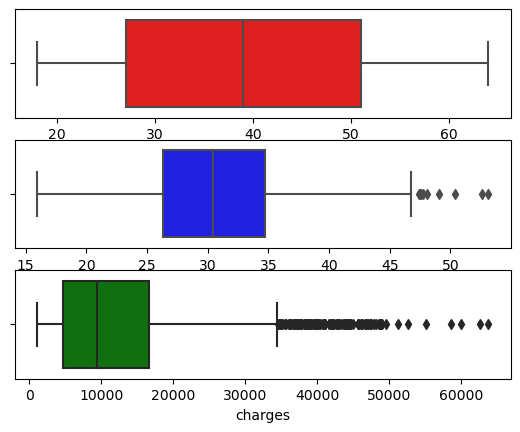

In [18]:
#creating subplot
plt.subplot(3,1,1)
sns.boxplot(df.age,orient='h',color='Red')
plt.subplot(3,1,2)
sns.boxplot(df.bmi,orient='h',color='Blue')
plt.subplot(3,1,3)
sns.boxplot(df.charges,orient='h',color='green')

In [19]:
stats.kurtosis(df.age)

-1.2449206804584227

In [20]:
stats.kurtosis(df.charges)

1.595821363956751

In [21]:
stats.kurtosis(df.bmi)

-0.05502310583700032

# Plot Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

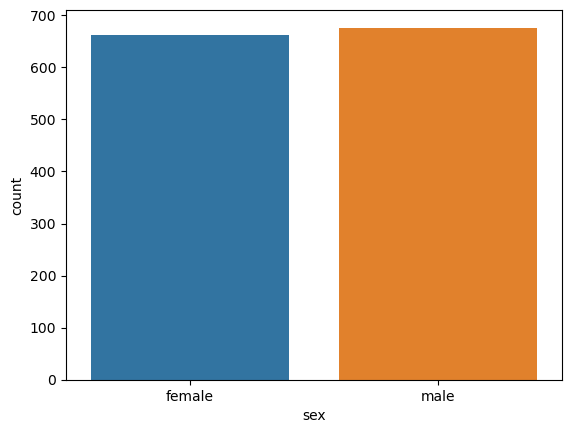

In [22]:
sns.countplot(x='sex',data=df)

<AxesSubplot:xlabel='children', ylabel='count'>

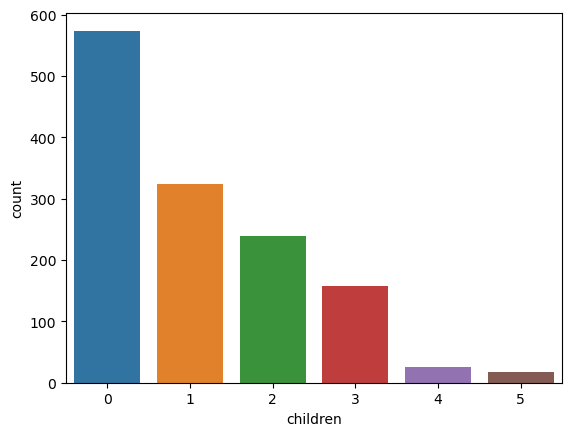

In [23]:
sns.countplot(x='children',data=df)

<AxesSubplot:xlabel='region', ylabel='count'>

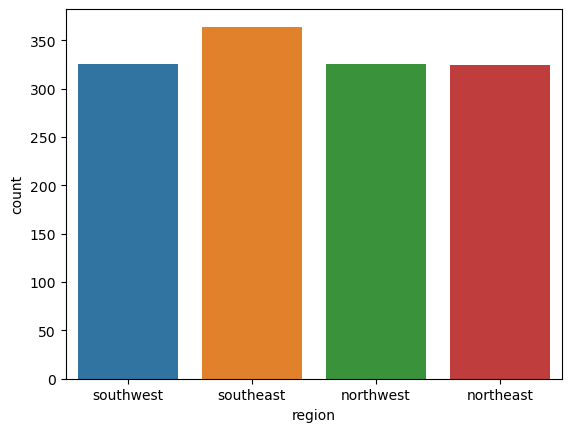

In [24]:
sns.countplot(x='region',data=df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

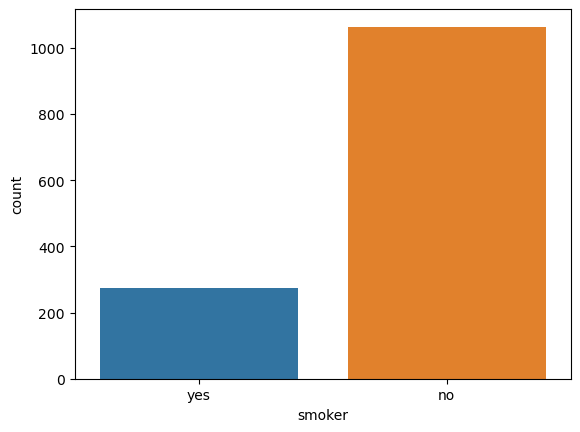

In [25]:
sns.countplot(x='smoker',data=df)

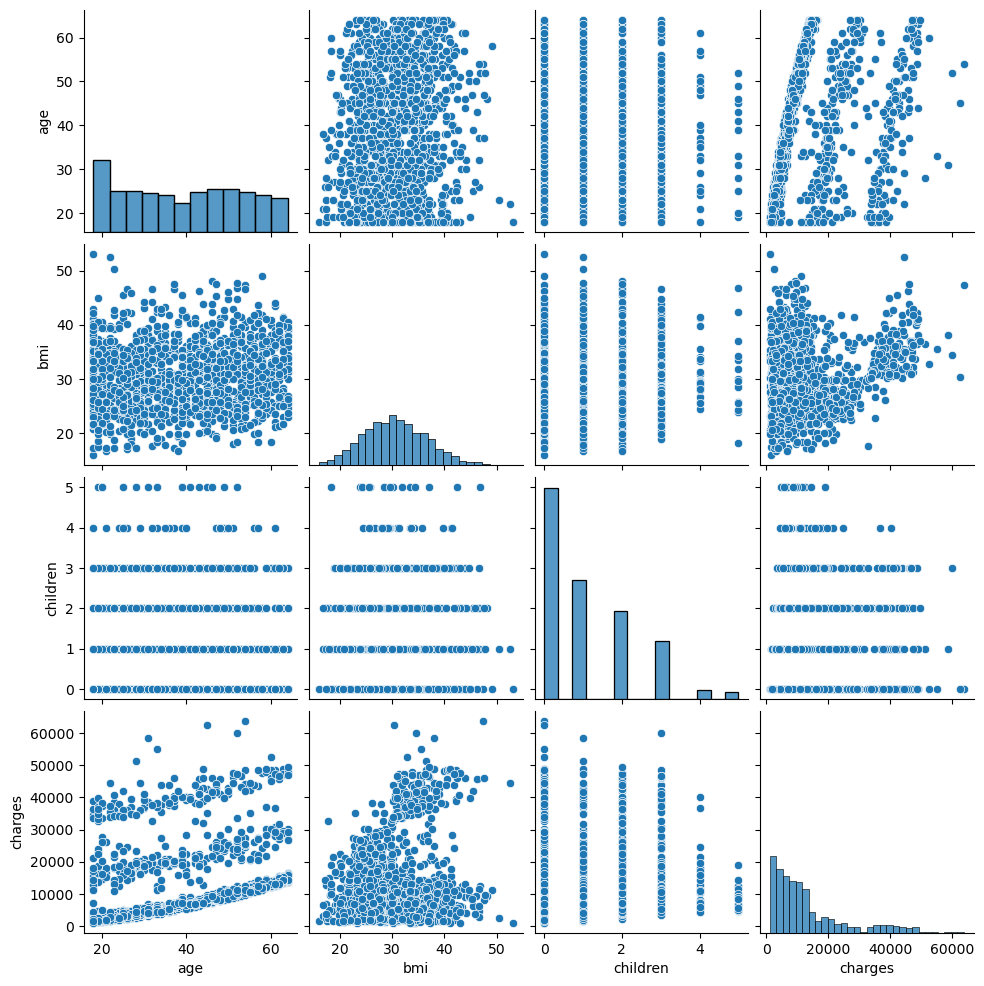

In [26]:
sns.pairplot(data=df)

In [27]:
df.cov()

,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


In [28]:
corelation=df.corr()
corelation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Bi-variate distribution of every possible attribute pair

# Check Correlation

To find out the correlation we will use the corr function and also we will plot a heatmap to visualise this correlation.

<AxesSubplot:>

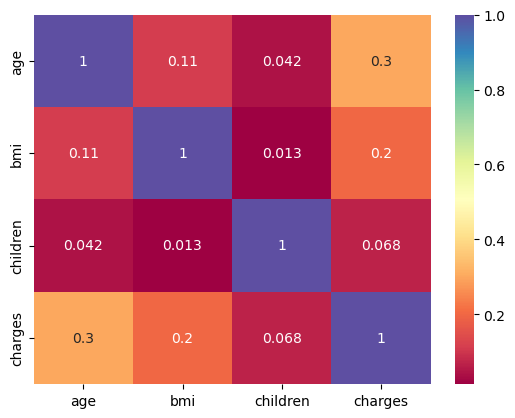

In [29]:
sns.heatmap(corelation,annot=True,cmap='Spectral')

In [30]:
#corelation(x,y)=co(x,y/sx*sy)
50874.802298/(14.04*12110)

0.2992205959732839

In [31]:
df.charges.std()

12110.011236693994

## Do charges of people who smoke differ significantly from the people who don't?

<AxesSubplot:xlabel='smoker', ylabel='charges'>

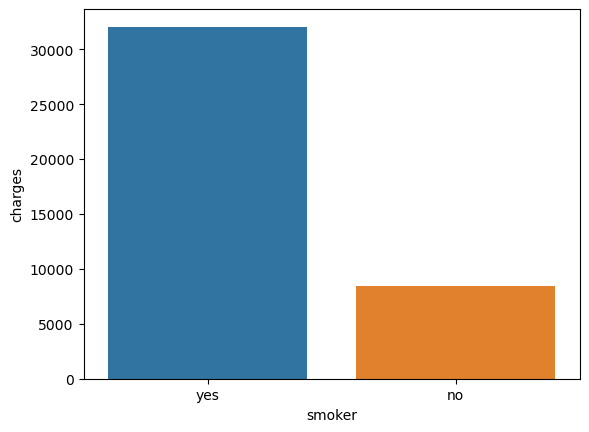

In [32]:
sns.barplot(x='smoker',y='charges',data=df,ci=None)

<AxesSubplot:xlabel='age', ylabel='charges'>

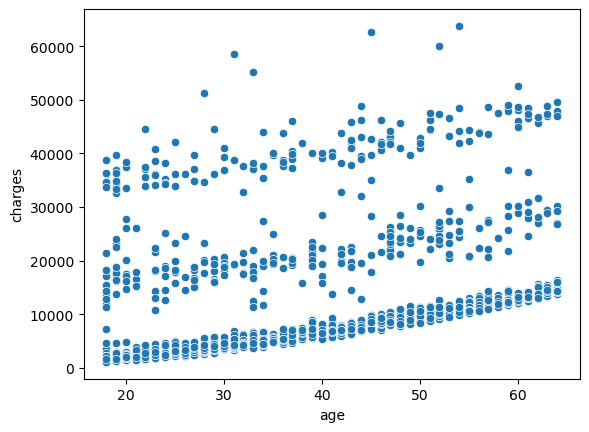

In [33]:
sns.scatterplot(x='age',y='charges',data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

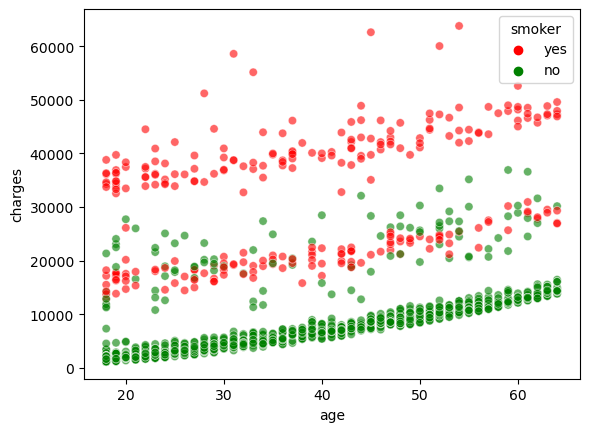

In [34]:
sns.scatterplot(x='age',y='charges',data=df,hue='smoker',palette=['red','green'],alpha=0.6)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

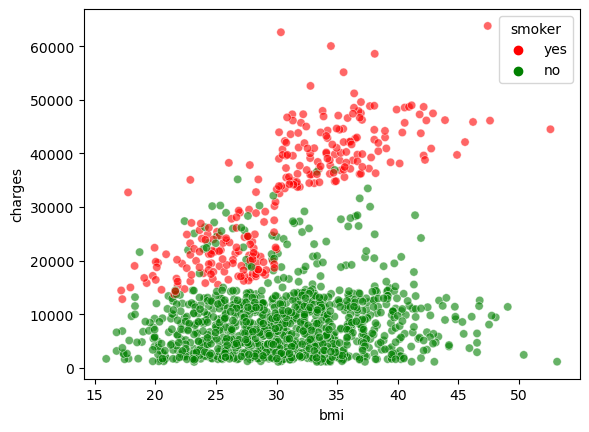

In [35]:
sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker',palette=['red','green'],alpha=0.6)

## Does bmi of males differ significantly from that of females?

In [36]:
df.groupby(by='sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [37]:
df.groupby(by='sex')['charges'].median()

sex
female    9412.96250
male      9369.61575
Name: charges, dtype: float64

In [38]:
df.groupby(by='age')['charges'].mean().sum()

644865.6153780911

In [39]:
list_1=pd.DataFrame({'Id':[101,102,103],'Name':['sindhu','kusuma','Harshini']})
list_2=pd.DataFrame({'Id':[101,102,104],'Score':[35,45,67]})
result=pd.merge(list_1,list_2,on='Id',how='right')
print(result)

    Id    Name  Score
0  101  sindhu     35
1  102  kusuma     45
2  104     NaN     67


In [40]:
list=['sindhu','kusuma','uma','george']
string=[len(list)]
print(string)

[4]


In [41]:
list2=['i','am','intersted','in','Data Science']
len(list2)

5

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


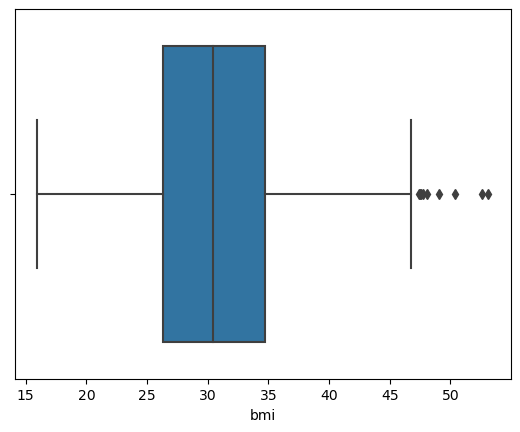

In [43]:
sns.boxplot(x='bmi',data=df);

In [44]:
def remove_outliers (col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [45]:
lr_bmi,ur_bmi=remove_outliers(df['bmi'])
df['bmi']=np.where(df['bmi']>ur_bmi,ur_bmi,df['bmi'])
df['bmi']=np.where(df['bmi']<lr_bmi,lr_bmi,df['bmi'])

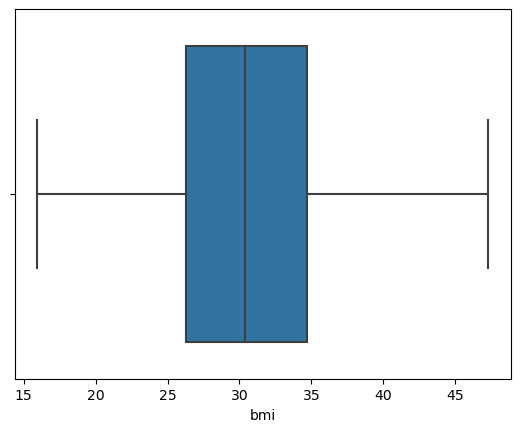

In [46]:
sns.boxplot('bmi',data=df);

## Label encoding

In [47]:
df['sex']=pd.Categorical(df['sex']).codes

In [48]:
df['smoker']=pd.Categorical(df['smoker']).codes

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [50]:
# onehot Encoding

In [51]:
df=pd.get_dummies(df,columns=['region'],drop_first=True)

In [52]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [53]:
from scipy.stats import zscore

In [54]:
df[['age','bmi']]=df[['age','bmi']].apply(zscore)

In [55]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.454201,0,1,16884.92400,0,0,1
1,-1.509965,1,0.515300,1,0,1725.55230,0,1,0
2,-0.797954,1,0.388125,3,0,4449.46200,0,1,0
3,-0.441948,1,-1.312218,0,0,21984.47061,1,0,0
4,-0.513149,1,-0.292342,0,0,3866.85520,1,0,0


In [56]:
#seprate dependent variables and independent variable into x and y
# x is independent and y is dependent variable
x=df.drop(['charges'],axis=1)
y=df[['charges']]

In [57]:
x.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.454201,0,1,0,0,1
1,-1.509965,1,0.515300,1,0,0,1,0
2,-0.797954,1,0.388125,3,0,0,1,0
3,-0.441948,1,-1.312218,0,0,1,0,0
4,-0.513149,1,-0.292342,0,0,1,0,0


In [58]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
#Train_Test_split(70:30)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [61]:
x_train.shape

(936, 8)

In [62]:
x_test.shape

(402, 8)

In [63]:
y_train.shape

(936, 1)

In [64]:
y_test.shape

(402, 1)

## Linear regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
regression_model=LinearRegression()

In [67]:
regression_model.fit(x_train,y_train)

LinearRegression()

In [68]:
regression_model.coef_[0]

array([ 3526.89614655,  -273.95081553,  1973.24612639,   343.17102854,
       24062.27662857,  -304.03684461,  -932.40966231,  -872.60695781])

In [69]:
for idx,col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,regression_model.coef_[0][idx]))

The coeff for age is 3526.8961465468
The coeff for sex is -273.9508155341846
The coeff for bmi is 1973.2461263944613
The coeff for children is 343.1710285369861
The coeff for smoker is 24062.276628568514
The coeff for region_northwest is -304.0368446137414
The coeff for region_southeast is -932.4096623100793
The coeff for region_southwest is -872.6069578138603


In [70]:
intercept=regression_model.intercept_[0]
intercept

8711.383045425771

In [71]:
# R square on train data
regression_model.score(x_train,y_train)

0.7546391460846524

In [72]:
regression_model.score(x_test,y_test)

0.740729938826683

In [73]:
#predicated data
predicated_train=regression_model.predict(x_train)
predicated_test=regression_model.predict(x_test)

In [74]:
y_train.head()

,charges
744,8827.2099
363,2597.7790
10,2721.3208
970,10702.6424
634,9391.3460


In [75]:
predicated_train

array([[ 9.46186933e+03],
       [ 2.22470510e+03],
       [ 3.42600408e+03],
       [ 1.07072946e+04],
       [ 1.38188703e+04],
       [ 8.62275378e+03],
       [ 2.90800522e+04],
       [ 3.72484124e+04],
       [ 3.50614507e+03],
       [ 6.46456687e+02],
       [ 1.41851196e+04],
       [ 2.73425024e+04],
       [ 1.13608180e+04],
       [ 1.42440461e+04],
       [ 5.84775053e+03],
       [ 2.65651963e+02],
       [ 1.07643154e+04],
       [ 2.72770605e+03],
       [ 8.20202673e+03],
       [ 1.19848282e+04],
       [ 4.78702108e+03],
       [ 6.46902447e+03],
       [ 6.73570592e+03],
       [ 2.49875964e+04],
       [-1.04562983e+03],
       [ 1.42048167e+03],
       [ 1.48349490e+04],
       [ 2.79949054e+04],
       [ 2.97775958e+04],
       [ 4.20082149e+03],
       [ 5.26134373e+03],
       [ 1.03817387e+04],
       [ 1.06309380e+04],
       [ 1.09734917e+04],
       [ 1.55798752e+04],
       [ 7.10567025e+03],
       [ 1.68476284e+04],
       [ 9.60522158e+03],
       [ 1.2

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
MES_train=mean_squared_error(y_train,predicated_train)
MES_train



36464396.71375472

In [78]:
RMES_train=np.sqrt(mean_squared_error(y_train,predicated_train))
RMES_train

6038.5757189717115

In [79]:
mean_squared_error(y_train,predicated_train,squared=False)

6038.5757189717115

In [80]:
from sklearn.metrics import mean_absolute_percentage_error

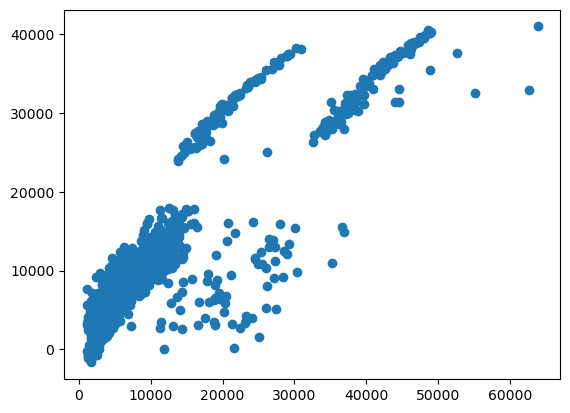

In [81]:
plt.scatter(y_train,predicated_train)

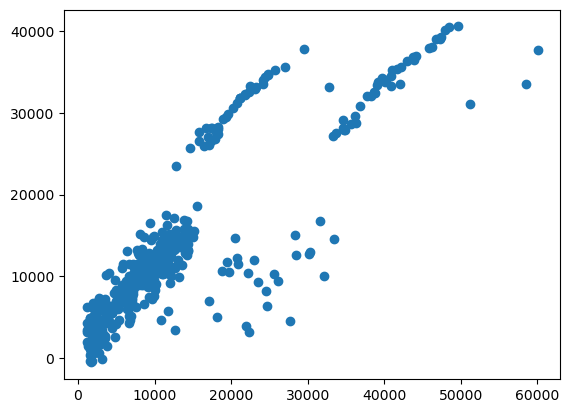

In [82]:
plt.scatter(y_test,predicated_test)

In [83]:
#Linear Model using StatsModel
data_train=pd.concat([x_train,y_train],axis=1)
data_test=pd.concat([x_test,y_test],axis=1)

In [84]:
data_train.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,charges
744,0.768473,1,-0.700292,0,0,1,0,0,8827.2099
363,-1.296362,0,-0.701944,1,0,0,0,1,2597.7790
10,-1.011557,1,-0.731673,0,0,0,0,0,2721.3208
970,0.768473,0,-0.411259,3,0,0,1,0,10702.6424
634,0.839674,1,1.494710,1,0,0,0,1,9391.3460


In [85]:
data_test.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,charges
559,-1.438764,1,0.805985,0,0,1,0,0,1646.4297
1087,1.266881,1,0.146989,0,0,1,0,0,11353.2276
1020,0.839674,1,1.048773,0,0,0,0,1,8798.5930
460,0.697271,0,0.987663,3,0,0,1,0,10381.4787
802,-1.296362,1,-1.379108,1,0,0,0,1,2103.0800


In [86]:
import statsmodels.formula.api as smf

In [87]:
expr='charges ~ age+sex+bmi+children+smoker+region_northwest+region_southwest+region_southwest'

In [88]:
lml=smf.ols(formula=expr,data=data_train).fit()

In [89]:
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     406.2
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          1.90e-277
Time:                        15:27:57   Log-Likelihood:                -9478.2
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     928   BIC:                         1.901e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8221.6251    397.984  

In [90]:
mean_squared_error(lml.predict(data_train.drop('charges',axis=1)),data_train['charges'])

36566943.93057651

In [91]:
mean_squared_error(lml.predict(data_train.drop('charges',axis=1)),data_train['charges'],squared=False)

6047.060767891829

In [92]:
mean_squared_error(lml.predict(data_test.drop('charges',axis=1)),data_test['charges'])

36927254.536457926

In [93]:
mean_squared_error(lml.predict(data_test.drop('charges',axis=1)),data_test['charges'],squared=False)

6076.779948003542

In [94]:
data_train.drop('sex',axis=1,inplace=True)
data_test.drop('sex',axis=1,inplace=True)

In [95]:
data_train.head()

,age,bmi,children,smoker,region_northwest,region_southeast,region_southwest,charges
744,0.768473,-0.700292,0,0,1,0,0,8827.2099
363,-1.296362,-0.701944,1,0,0,0,1,2597.7790
10,-1.011557,-0.731673,0,0,0,0,0,2721.3208
970,0.768473,-0.411259,3,0,0,1,0,10702.6424
634,0.839674,1.494710,1,0,0,0,1,9391.3460


In [96]:
expr='charges ~ age+bmi+children+smoker+region_northwest+region_southeast+region_southwest'

In [99]:
lm2=smf.ols(formula=expr,data=data_train).fit()

In [100]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     407.5
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          6.55e-278
Time:                        17:56:51   Log-Likelihood:                -9477.1
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     928   BIC:                         1.901e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8567.8469    454.347  

In [101]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.454201,0,1,16884.92400,0,0,1
1,-1.509965,1,0.515300,1,0,1725.55230,0,1,0
2,-0.797954,1,0.388125,3,0,4449.46200,0,1,0
3,-0.441948,1,-1.312218,0,0,21984.47061,1,0,0
4,-0.513149,1,-0.292342,0,0,3866.85520,1,0,0


In [103]:
values=np.array([0.1,1,0.3,0,4445,0,1,1])

In [104]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [105]:
LR.predict(values.reshape(1,-1))

array([[1.06964397e+08]])

## Regularization of Linear Regression model

In [106]:
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [107]:
for idx,col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,regression_model.coef_[0][idx]))

The coeff for age is 3526.8961465468
The coeff for sex is -273.9508155341846
The coeff for bmi is 1973.2461263944613
The coeff for children is 343.1710285369861
The coeff for smoker is 24062.276628568514
The coeff for region_northwest is -304.0368446137414
The coeff for region_southeast is -932.4096623100793
The coeff for region_southwest is -872.6069578138603


In [108]:
predicated_train=regression_model.predict(x_train)
predicated_test=regression_model.predict(x_test)

In [109]:
regression_model.score(x_train,y_train)

0.7546391460846524

In [110]:
regression_model.score(x_test,y_test)

0.740729938826683

In [111]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [112]:
#LinearRegression model
ridge_model=Ridge()
ridge_model.fit(x_train,y_train)

Ridge()

In [113]:
for idx,col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,ridge_model.coef_[0][idx]))

The coeff for age is 3522.898456793194
The coeff for sex is -264.1602405739518
The coeff for bmi is 1970.2557288437208
The coeff for children is 342.63531968523193
The coeff for smoker is 23905.084210548226
The coeff for region_northwest is -298.3968117501314
The coeff for region_southeast is -914.6276696064533
The coeff for region_southwest is -862.4272873089415


In [114]:
ridge_model.score(x_train,y_train)

0.754611776854992

In [115]:
ridge_model.score(x_test,y_test)

0.7409190374252984

In [116]:
# lasso Regression model
Lasso_model=Lasso()
Lasso_model.fit(x_train,y_train)

Lasso()

In [117]:
for idx,col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,Lasso_model.coef_[idx]))

The coeff for age is 3526.040543761678
The coeff for sex is -268.87389640499913
The coeff for bmi is 1971.007436931297
The coeff for children is 342.26601060178024
The coeff for smoker is 24056.035313751632
The coeff for region_northwest is -286.7244013874169
The coeff for region_southeast is -914.227809710124
The coeff for region_southwest is -855.2857435186914


In [118]:
Lasso_model.score(x_train,y_train)

0.7546386838854932

In [119]:
Lasso_model.score(x_test,y_test)

0.7407188006330081

## VIF Variance Infaltion Factor

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
x.values

array([[-1.43876426,  0.        , -0.45420102, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  1.        ,  0.51529985, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  1.        ,  0.38812512, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  0.        ,  1.02399878, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188,  0.        , -0.8010412 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573,  0.        , -0.2609615 , ...,  1.        ,
         0.        ,  0.        ]])

In [122]:
x.shape

(1338, 8)

In [123]:
# variale having VIF >10 are causing muiltcolinearity
VIF=[variance_inflation_factor(x.values,ix) for ix in range(x.shape[1])]
i=0
for column in x.columns:
    if i<10:
        print(column,VIF[i])
        i=i+1

age 1.0172517155172907
sex 1.7276329710022946
bmi 1.0894238500263063
children 1.6171413000944357
smoker 1.2349638036669421
region_northwest 1.3404356004807791
region_southeast 1.4612111423444158
region_southwest 1.3329706938450583
